In [45]:
'''
This code randomly generates a traveling salesperson problem space and finds the best path through a 
genetic algorithm

It was developed by Douglas Raimundo de Oliveira Silva for the discipline of Artificial Intelligence at 
the Federal University of Itajubá in Brazil

You can change the number of cities just by adding or removing letters where it will be flagged in the code, 
the entire remaining process is automated. 
each member consists of a set of letters that are not repeated, they describe the order of the cities that will 
be visited, for example, the member 'ABC' will visit city A, then B and then C. All members start at A

Created by Douglas Raimundo de Oliveira Silva
dellonath@gmail.com
'''

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random 
import pandas as pd

def most_approximated_city(letter): # return the most approximated city letter
    appr = {}
    aux = cities.copy()
    aux.remove(letter)
    for i in aux:
        appr[i] = distances[letter+i]
    letter = min(appr, key=appr.get)
    return letter

def distance_cities(x):
    w = list(x)
    travel = 0
    for i in range(0, int(len(x)-1)):
        travel += distances[w[i]+w[i+1]] # takes city by city and adds their distances
    return travel

def random_swap_mutation(x): # function to execute a mutation in member k
    '''
    this function generates two random values i and j and exchanges the i-th value with the j-th value
    '''
    i = randint(1, len(x)-1)
    j = randint(1, len(x)-1)
    aux = x[i]
    x[i] = x[j]
    x[j] = aux
    return x

def approximated_mutation(x): 
    '''
    this mutation takes a random letter from the member and makes the next letter the letter 
    whose closest is to the letter chosen initially
    '''
    aux = x[randint(1, len(cities)-1)] # take a random letter after 'A'
    letter = most_approximated_city(aux)
    x.remove(letter) 
    x.insert(x.index(aux)+1, letter) # insert the most approximated letter after the selectioned letter
    return x

def member_travel(x): # takes route planning -> 'ABCDE' return ['AB', 'BC', 'CD', 'DE']
    aux = []
    for i in range(len(x) - 1):
        aux.append(x[i]+x[i+1])
    return aux   
        
def member_analyses(x): # plots the cost of each member's travel
    '''
    this function plots the member spend each way
    '''
    aux = member_travel(x)
    values = []
    for i in aux:
        values.append(distances[i])
    plt.figure(figsize = (10, 5)) # plot size
    plt.plot(aux, values)

def generation_create(x): # generation creator, this function creates x new random members with your travel value
    members = {}
    while len(members) != x:
        new_member = []
        letters = cities.copy()
        new_member.append('A')
        letters.remove('A')
        for i in range(len(cities)-1):
            letter = random.choice(letters)
            new_member.append(letter)
            letters.remove(letter)
        if ''.join(new_member) not in members.keys(): # cheks if this new member was be created
            if randint(0, 100) <= 2: # 2% to have a mutation in the new member
                new_member = random_swap_mutation(new_member)
            if randint(0, 100) <= 2: # 2% to have a mutation in the new member
                new_member = approximated_mutation(new_member)
                
            members[''.join(new_member)] = distance_cities(''.join(new_member))
    return members

def dist(x, y, x1, y1): # travelled distance calculator function between two cities
    return pow(pow(x - x1, 2)+pow(y - y1, 2), 0.5)

def son(x, y): # this function generates a child by crossing two members
    '''
    the generation of the child occurs through the alternation of the values of the two parents in sequence, 
    these values are placed as they appear in the parents, first the father's value and then the mother's value
    
    example: parents 'ADILEKFBCHGJ' and 'AIEFCKGBHJDL' creates 'ADILEKFBCHGJ'
    '''
    xy_son = []
    father = list(x).copy()
    mom = list(y).copy()
    father.remove('A')
    mom.remove('A')
    xy_son.append('A')
    count = 0
    i = 0
    
    while len(xy_son) != len(cities):
        if count % 2 == 0:
            aux = father.pop(0)
            if not aux in xy_son:
                xy_son.append(aux)
        else:
            aux = mom.pop(0)
            if not aux in xy_son:
                xy_son.append(aux)
        count += 1
    return ''.join(xy_son), way(''.join(xy_son))

def way(x):
    distance = 0
    for i in range(len(cities) - 1):
        distance += distances[x[i]+x[i+1]]
    return distance

def born_new_population(super_gen, x):
    '''
    this function generates x new members in the total population, here called super_gen
    '''
    gen = pd.DataFrame(super_gen.items())
    best = list(gen[gen[1] < gen[1].mean()][0])
    for i in range(x):
        new = son(random.choice(best), random.choice(best))
        super_gen[new[0]] = new[1]

def best_member(x): # this function returns the best member of the population
    return min(x, key=x.get)

def coord(x): # this function returns the coordinates in sequence of the member
    cood = []
    for k in x:
        for i in range(len(cities)):
            if k in coords_list[i]:
                cood.append(coords_list[i])
    return cood

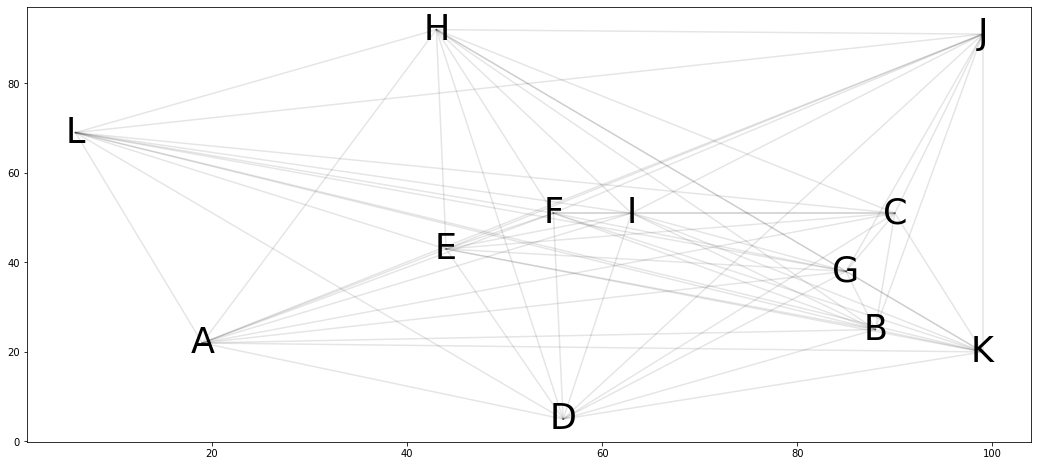

In [46]:
coords_list = []
for i in 'ABCDEFGHIJKL': # CHANGE DE CITY NUMBER IN THIS STRING
    cood1 = randint(1, 100) # change the minimum and maximum coordinates
    cood2 = randint(1, 100)
    coords_list.append((cood1, cood2, i))

global distances
global cities

distances = {}
for i in coords_list:
    for j in coords_list:
        distances[i[2]+j[2]] = dist(i[0], i[1], j[0], j[1]) # distances between two cities

X = [coords_list[i][0] for i in range(len(coords_list))] # cood x
Y = [coords_list[i][1] for i in range(len(coords_list))] # cood y
cities = [coords_list[i][2] for i in range(len(coords_list))] # city id ('A', 'B', 'C', ...)

plt.figure(figsize = (18, 8)) # plot size
for a, b, k in coords_list:
    for c, d, z in coords_list:
        plt.plot((a, c), (b, d), color = 'black', alpha = 0.05) # ploting the ways

ax = sns.scatterplot(X, Y, alpha = 0) # ploting the cities, you can add the circles to representate the cities
for i in range(len(coords_list)): # write the id cities
     ax.text(X[i], Y[i], cities[i], fontsize = 35, color = 'black', 
             horizontalalignment = 'center', 
             verticalalignment = 'center')

In [65]:
'''
in this sector you can change the scenario for other situations and tests
'''

# careful, you will create x new different members, this can take a time if you send as parameter a number nearby
# of factorial of number of cities

firsts = 10000          # number of firsts member
gens = 150              # number of generations
member_gen = 1000       # number of members each generation

super_gen = generation_create(firsts)

In [66]:
for i in range(gens): 
    born_new_population(super_gen, member_gen)

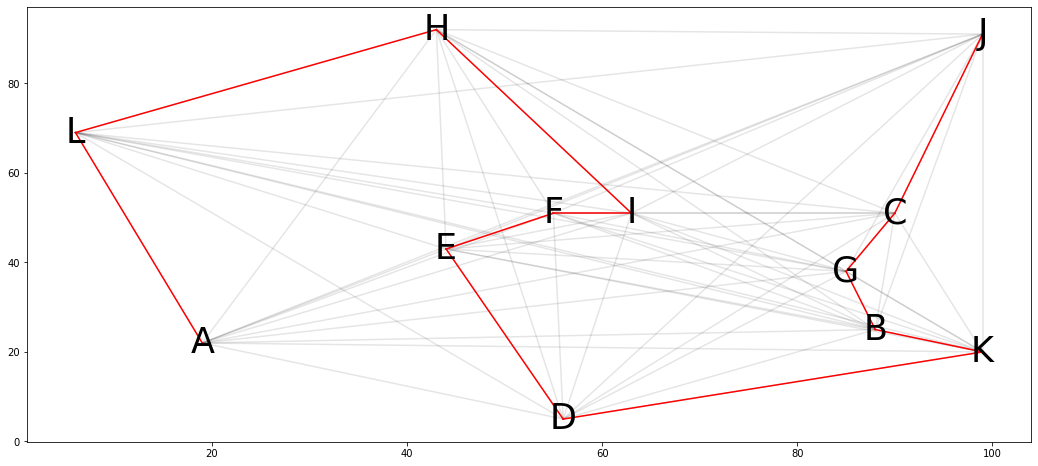

In [68]:
plt.figure(figsize = (18, 8)) # plot size
for a, b, k in coords_list:
    for c, d, z in coords_list:
        plt.plot((a, c), (b, d), color = 'black', alpha = 0.05) # ploting the ways

best_coords = coord(best_member(super_gen))
for T in range(len(cities)-1):
    a, b, k = best_coords[T]
    c, d, z = best_coords[T+1]
    plt.plot((a, c), (b, d), color = 'red', alpha = 1) # ploting the ways

ax = sns.scatterplot(X, Y, alpha = 0) # ploting the cities, you can add the circles to representate the cities
for i in range(len(coords_list)): # write the id cities
     ax.text(X[i], Y[i], cities[i], fontsize = 35, color = 'black', 
             horizontalalignment = 'center', 
             verticalalignment = 'center')

In [67]:
print('Statistics:\n')
print('Number of members:', len(super_gen))
print('Number of generations:', gens)
print('Best Member:', best_member(super_gen), way(best_member(super_gen)))

Statistics:

Number of members: 151631
Number of generations: 150
Best Member: ALHIFEDKBGCJ 325.29423875528437
